# Credit card fraud detection problem

Kaggle dataset & problem description: https://www.kaggle.com/mlg-ulb/creditcardfraud

## Dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import numpy as np

In [3]:
data_df = pd.read_csv('/content/gdrive/MyDrive/creditcard.csv')

In [4]:
data_df.shape

(284807, 31)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data preprocessing

### Outliers treatment

#### - trimming

1. use z-score treatment

In [7]:
from scipy import stats

In [8]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
z = np.abs(stats.zscore(data_df))

In [12]:
z.shape

(284807, 31)

In [13]:
threshold = 3
print(np.where(z > 3))

(array([     2,      7,      7, ..., 284802, 284802, 284805]), array([16,  8, 28, ..., 10, 14, 19]))


In [ ]:
data_df_o = data_df[(z < 3).all(axis=1)]

==> 위와 같이 간단하게 data_df전체를 대상으로 z-score 기반 trimming이 가능하지만. data_df['Class]열에는 적합하지않다.

2. use normal distribution 3-sigma boundary

In [14]:
# Class column을 제외한 모든 column에 outlier제거 조건을 지정해준다.
threshold_h = []
threshold_l = []
for c in data_df.columns:
  threshold_h.append(data_df[c].mean() + 3*data_df[c].std())
  threshold_l.append(data_df[c].mean() - 3*data_df[c].std())

In [15]:
threshold_l.pop()
threshold_h.pop()

0.12630905453740562

In [16]:
threshold_l.pop(0)
threshold_h.pop(0)

237278.29743877816

In [17]:
len(threshold_h)

29

In [18]:
columns_list = data_df.columns[1:-1]
columns_list

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
for m in zip(columns_list, threshold_h, threshold_l):
  print(m)

In [19]:
for m in zip(columns_list, threshold_h, threshold_l):
  data_df_o_sigma = data_df[(data_df[m[0]] < m[1]) & (data_df[m[0]] > m[2])]

In [20]:
data_df_o_sigma.shape

(280731, 31)

In [21]:
data_df_o_sigma['Class'].unique()

array([0, 1])

In [22]:
data_df_o_sigma.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000,280731.000000
mean,94835.913918,0.038681,0.071357,0.030186,-0.013448,0.041307,-0.022102,-0.043336,0.011578,0.003900,0.009684,-0.000559,0.000930,-0.000299,-0.004002,-0.000098,-0.001169,-0.000679,-0.001180,0.003873,-0.025994,-0.007442,0.005542,0.006926,-0.000696,0.002372,-0.000280,-0.000423,-0.000944,66.955683,0.001713
std,47504.281691,1.882536,1.439827,1.478298,1.401818,1.255481,1.280068,1.077211,1.178021,1.094350,1.082742,1.020336,0.999414,0.995636,0.958326,0.913830,0.870573,0.850227,0.834530,0.810123,0.604041,0.715015,0.718322,0.490275,0.604706,0.513508,0.480214,0.381132,0.296640,116.026593,0.041358
min,0.000000,-46.855047,-47.429676,-33.680984,-5.683171,-23.669726,-23.496714,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-4.932733,-23.420173,-34.830382,-8.887017,-36.666000,-2.836627,-7.495741,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54253.500000,-0.898036,-0.566137,-0.853485,-0.854982,-0.665084,-0.773231,-0.561860,-0.202424,-0.636215,-0.526402,-0.762073,-0.402314,-0.649235,-0.428542,-0.582048,-0.466623,-0.484710,-0.497547,-0.450235,-0.212670,-0.229609,-0.537605,-0.157270,-0.355190,-0.314983,-0.326278,-0.068648,-0.053046,5.380000,0.000000
50%,84733.000000,0.042222,0.080514,0.198825,-0.028632,-0.040038,-0.283231,0.029240,0.026086,-0.048429,-0.088635,-0.033639,0.141755,-0.013130,0.047165,0.049492,0.066130,-0.067747,-0.005017,0.006774,-0.065376,-0.032751,0.010483,-0.009623,0.040413,0.018225,-0.051343,0.002398,0.010657,20.930000,0.000000
75%,139347.000000,1.324954,0.814508,1.039821,0.728814,0.621964,0.375802,0.550716,0.331667,0.597482,0.459919,0.738816,0.618459,0.663109,0.487912,0.649517,0.520420,0.397529,0.497041,0.460981,0.124439,0.178992,0.531709,0.147257,0.438370,0.351520,0.239589,0.091220,0.075070,73.390000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,13.129143,34.099309,16.614054,15.661716,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,6.442798,9.253526,4.295648,5.591971,16.756448,27.202839,10.503090,22.083545,4.022866,7.519589,3.517346,8.708972,22.620072,838.700000,1.000000


3. use IQR score trimming

In [23]:
Q1 = data_df.quantile(0.25)
Q3 = data_df.quantile(0.75)

In [25]:
Q1 = Q1[1:-1]
Q1

V1       -0.920373
V2       -0.598550
V3       -0.890365
V4       -0.848640
V5       -0.691597
V6       -0.768296
V7       -0.554076
V8       -0.208630
V9       -0.643098
V10      -0.535426
V11      -0.762494
V12      -0.405571
V13      -0.648539
V14      -0.425574
V15      -0.582884
V16      -0.468037
V17      -0.483748
V18      -0.498850
V19      -0.456299
V20      -0.211721
V21      -0.228395
V22      -0.542350
V23      -0.161846
V24      -0.354586
V25      -0.317145
V26      -0.326984
V27      -0.070840
V28      -0.052960
Amount    5.600000
Name: 0.25, dtype: float64

In [26]:
Q3 = Q3[1:-1]

In [27]:
IQR = Q3 - Q1
print(IQR)

V1         2.236015
V2         1.402274
V3         1.917560
V4         1.591981
V5         1.303524
V6         1.166861
V7         1.124512
V8         0.535976
V9         1.240237
V10        0.989349
V11        1.502088
V12        1.023810
V13        1.311044
V14        0.918724
V15        1.231705
V16        0.991333
V17        0.883423
V18        0.999657
V19        0.915248
V20        0.344762
V21        0.414772
V22        1.070904
V23        0.309488
V24        0.794113
V25        0.667861
V26        0.567936
V27        0.161885
V28        0.131240
Amount    71.565000
dtype: float64


In [ ]:
# 한줄로 IQR기반 필터가능하지만, Class=0,1 열에 적절하지 못함.
data_df_o_iqr = data_df[~((data_df < (Q1 - 1.5 * IQR)) |(data_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
for m in zip(columns_list, Q1, Q3, IQR):
  print(m)

In [28]:
# 다음과 같이 Time, Class 열을 제외하고 IQR기반 필터링 진행:
for m in zip(columns_list, Q1, Q3, IQR):
  data_df_o_iqr = data_df[(data_df[m[0]] > (m[1] - 1.5 * m[3])) & (data_df[m[0]] < (m[2] + 1.5 * m[3]))]

In [29]:
data_df_o_iqr.shape

(252903, 31)

In [30]:
data_df_o_iqr.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000
mean,94986.492228,0.094504,0.230435,0.060689,-0.019030,0.116567,-0.059286,-0.083767,0.024857,0.008731,0.024355,0.004205,-0.003704,0.005142,-0.004651,0.009038,0.017282,-0.004268,-0.009348,0.009024,-0.058020,-0.018557,0.002675,0.006637,0.001982,0.002301,-0.001892,0.002238,-0.001567,34.974887,0.001586
std,47594.978003,1.820271,1.293522,1.471043,1.393801,1.214682,1.264431,1.038737,1.156919,1.081381,1.085583,1.020414,1.003506,1.001200,0.965117,0.907461,0.847545,0.850821,0.817479,0.801149,0.511708,0.705072,0.714132,0.433929,0.602656,0.505696,0.469089,0.371147,0.266247,42.172250,0.039788
min,0.000000,-40.470142,-47.429676,-33.680984,-5.683171,-23.669726,-23.496714,-43.557242,-41.484823,-13.434066,-24.588262,-4.797473,-18.683715,-4.008640,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-4.932733,-22.838548,-22.797604,-8.887017,-36.666000,-2.836627,-7.495741,-1.732008,-9.895244,-8.478686,0.000000,0.000000
25%,54533.500000,-0.859648,-0.397907,-0.816557,-0.850251,-0.567459,-0.793053,-0.576955,-0.196253,-0.615814,-0.512250,-0.755431,-0.401127,-0.647624,-0.429866,-0.567863,-0.442342,-0.491763,-0.495915,-0.437231,-0.219412,-0.237517,-0.544744,-0.141823,-0.355170,-0.314581,-0.322206,-0.063949,-0.054103,4.490000,0.000000
50%,85041.000000,0.035238,0.165842,0.225603,-0.024476,0.021158,-0.318741,0.016034,0.029424,-0.045243,-0.083998,-0.032767,0.141635,-0.007785,0.048047,0.060567,0.078694,-0.076318,-0.014379,0.011344,-0.082561,-0.047347,0.005992,-0.005033,0.040299,0.012927,-0.041085,0.006947,0.008817,16.000000,0.000000
75%,139586.000000,1.356675,0.878353,1.067617,0.717123,0.666514,0.311231,0.515631,0.335343,0.583818,0.451343,0.741247,0.616089,0.673130,0.487014,0.655213,0.522708,0.390921,0.476231,0.458440,0.080236,0.158554,0.528770,0.141507,0.439066,0.349265,0.229586,0.096233,0.072347,49.990000,0.000000
max,172788.000000,2.454930,22.057729,4.226108,12.114672,34.099309,8.933762,6.491054,20.007208,10.392889,15.331742,12.018913,4.846452,4.569009,7.692209,5.685899,5.720320,9.253526,4.295648,5.591971,11.059004,27.202839,8.361985,22.083545,4.022866,7.519589,3.463246,8.254376,22.620072,184.500000,1.000000


==> 3sigma boundary보다 IQR 기반의 trimming 방식으로 더 많은 outlier처리가 가능했다. 이 후의 data balancing 및 example modeling은 IQR 기반으로 outlier 제거가된 data_df_o_iqr로 진행했다.

In [32]:
y_iqr = data_df_o_iqr["Class"]
X_iqr = data_df_o_iqr.copy().drop("Class",axis=1)

### data balancing:

#### SMOTE (Synthetic Minority Oversampling Technique)

In [33]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [35]:
# check the imbalanced class distribution before balancing
counter = Counter(y_iqr)
print(counter)

Counter({0: 252502, 1: 401})


In [36]:
# SMOTE resampling strategy 비율 조정하여 X_balanced_iqr, y_balanced_iqr 생성

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
# define pipeline
pipeline = Pipeline(steps=steps)

X_balanced_iqr, y_balanced_iqr = pipeline.fit_resample(X_iqr, y_iqr)
# summarize the new class distribution
counter = Counter(y_balanced_iqr)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 50500, 1: 25250})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


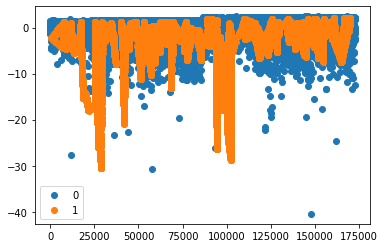

In [37]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_balanced_iqr == label)[0]
	pyplot.scatter(X_balanced_iqr[row_ix, 0], X_balanced_iqr[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [38]:
X_balanced_iqr.shape

(75750, 30)

In [39]:
y_balanced_iqr.shape

(75750,)

#### sklearn의 model selection train_test_split

shuffle=True설정 후 9:1로 split

In [40]:
from sklearn.model_selection import train_test_split

X_b_train_iqr, X_b_test_iqr, y_b_train_iqr, y_b_test_iqr = train_test_split(X_balanced_iqr, y_balanced_iqr,
    shuffle=True, random_state=42, test_size=0.1)

In [41]:
X_b_train_iqr.shape

(68175, 30)

In [42]:
X_b_test_iqr.shape

(7575, 30)

In [43]:
y_b_train_iqr.shape

(68175,)

In [44]:
y_b_test_iqr.shape

(7575,)

## Modeling & Evaluation

### 1. SGDClassifier

In [46]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(max_iter=5000, tol=1e-3, random_state=42)
sgd_clf.fit(X_b_train_iqr, y_b_train_iqr)
cross_val_score(sgd_clf, X_b_train_iqr, y_b_train_iqr, cv=3, scoring="accuracy")

array([0.82556656, 0.33478548, 0.3669967 ])

#### 평가 

score값으로 보아 평가 결과가 좋지 않을것이다. 오차행렬로 예측 내용을 상세확인 할 수 있다.

**오차행렬=confusion_matrix**

confusion_matrix(2 by 2) for binary classifications: row=클래스 구분 / col=예측한 값

1st row = 음성 클래스

2nd row = 양성 클래스 

1st col = 음성 클래스를 예측한 값

2nd col = 양성 클래스를 예측한 값 

In [47]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_val_predict

y_b_train_pred_iqr = cross_val_predict(sgd_clf, X_b_train_iqr, y_b_train_iqr, cv=3)
cm = confusion_matrix(y_b_train_iqr, y_b_train_pred_iqr)
cm

array([[16011, 29516],
       [ 3950, 18698]])

In [48]:
from sklearn.metrics import precision_score, recall_score

#정밀도
#TP/(FP+TP) FP가 큰 경우라서 정밀도가 낮음
precision_score(y_b_train_iqr, y_b_train_pred_iqr)

0.3878126685195172

In [50]:
#재현율
#TP/(FN+TP)
recall_score(y_b_train_iqr, y_b_train_pred_iqr)

0.825591663723066

In [51]:
from sklearn.metrics import f1_score

f1_score(y_b_train_iqr, y_b_train_pred_iqr)

0.527729953995089

### 2. DecisionTree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

tree_c = DecisionTreeClassifier(random_state=42, min_samples_leaf=0.05) #min_samples_leaf 규제 적용
tree_c.fit(X_b_train_iqr, y_b_train_iqr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.05, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [54]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_val_predict

y_train_pred_dct= cross_val_predict(tree_c, X_b_train_iqr, y_b_train_iqr, cv=3)
cm = confusion_matrix(y_b_train_iqr, y_train_pred_dct)
cm

array([[44851,   676],
       [ 2170, 20478]])

양성(fraud) 인데, 음성(valid)로 잘못 예측하는 결과가 아직 높은 편이다.

실제 test data로 확인 시, 95.7% 수준의 정확도와 93.5%의 f1_score 값이 확인된다. 개선의 여지가 있다.

In [55]:
y_pred_dct = tree_c.predict(X_b_test_iqr)
np.sum(y_b_test_iqr == y_pred_dct) / len(y_b_test_iqr) 

0.9573597359735974

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score(y_b_train_iqr, y_train_pred_dct)

0.9350257979087713

### 3. RandomForestClassifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_b_train_iqr, y_b_train_iqr)

y_pred_rf = rnd_clf.predict(X_b_test_iqr)
y_pred_rf

array([0, 0, 1, ..., 0, 0, 0])

In [58]:
y_b_train_pred_iqr = cross_val_predict(rnd_clf, X_b_train_iqr, y_b_train_iqr, cv=3)
cm = confusion_matrix(y_b_train_iqr, y_b_train_pred_iqr)
cm

array([[45430,    97],
       [ 1435, 21213]])

In [59]:
precision_score(y_b_train_iqr, y_b_train_pred_iqr)

0.9954481464101361

In [60]:
recall_score(y_b_train_iqr, y_b_train_pred_iqr)

0.9366389968209113

In [61]:
f1_score(y_b_train_iqr, y_b_train_pred_iqr)

0.9651485508894854

In [62]:
np.sum(y_b_test_iqr == y_pred_rf) / len(y_b_test_iqr) 

0.9767656765676568

RandomForest로 더 개선된 97.7% 수준의 정확도가 확보된다.

random forest 모델의 변수중 feature_importances_를 통해 각 특성의 중요도를 확인할 수 있다.

In [63]:
for score in zip(rnd_clf.feature_importances_):
    print(score)

(0.0008327950778195999,)
(0.002482219145432791,)
(0.030219677536404383,)
(0.06712808034610274,)
(0.09530417909993094,)
(0.005661179750300118,)
(0.007610311600928697,)
(0.03766937580900821,)
(0.0012076431359261109,)
(0.019064892897770032,)
(0.14826155336392763,)
(0.0918924797404028,)
(0.11847278009385989,)
(0.0004293264394976653,)
(0.21115646667936286,)
(0.00037273219343943604,)
(0.03807368394925987,)
(0.09191161808639839,)
(0.005667295322615926,)
(0.0010169086725474988,)
(0.0013511565789650465,)
(0.01514265222544161,)
(0.0005144067332058397,)
(0.00028213727409311936,)
(0.00016683229239820833,)
(0.0002846518020279179,)
(0.0002521420178445201,)
(0.0031374625646348043,)
(0.0040794372116388766,)
(0.0003539223588146436,)
